# 2D Design Template

# Overview

The purpose of this project is for you to apply what you have learnt in this course. This includes working with data and visualizing it, create model of linear regression, as well as using metrics to measure the accuracy of your model. 

Please find the project handout description in the following [link](https://edimension.sutd.edu.sg/webapps/blackboard/content/listContent.jsp?course_id=_5261_1&content_id=_184406_1).


## Deliverables

You need to submit this Jupyter notebook together with the dataset into Vocareum. Use the template in this notebook to work on this project. You are free to edit or add more cells if needed

## Students Submission

Student's Name:
- Low Jiaen Phoebe
- Alaina Akriti Jaiswal
- Wong Pui Ling 
- Siar Wei Ju
- Linda Shalash

### Problem Statement

How can we support farmers in predicting crop yields by understanding how farming practices like pesticide usage, fertilizer application, and organic farming impact their harvests?

### Dataset

- Describe your dataset.
- Put the link to the sources of your raw dataset.
- Put python codes for loading the data into pandas dataframe(s). The data should be the raw data downloaded from the source. No pre-processing using any software (excel, python, etc) yet. Include this dataset in your submission
- Explain each column of your dataset (can use comment or markdown)
- State which column is the dependent variable (target) and explain how it is related to your problem statement
- State which columns are the independent variables (features) and describe your hypothesis on why these features can predict the target variable

Dataset(s) Description

Links to Sources of Raw Datasets:

In [1]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.axes as axes
import seaborn as sns
import numpy as np
from IPython.display import display
from datetime import datetime

In [2]:
from typing import TypeAlias
from typing import Optional, Any    

Number: TypeAlias = int | float

The loading of the Dataset begins here. This is how we read our initial 2 datasets.

Target Feature: hg/ha yield (old target variable) -> we want the total crop yield (get by summing hg/ha yield per country per year)

Features: average_rain_fall_mm_per_year, pesticide_tonnes, avg_temp

In [3]:
#this dataset gives me Country, Crop type, Year, Precipitation(mm),Pesticide(tonnes), crop yield(hg/ha)
df: pd.DataFrame = pd.read_csv('Data/climate-ds.csv') 

#improvement of model part 1. Importing another dataset of precipitation. It will be shown later why we do so.
df2: pd.DataFrame = pd.read_csv('Data/average-precipitation-per-year.csv')


In [4]:
# Display the DataFrame(s)
df.head()

,Unnamed: 0,Area,Item,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,hg/ha_yield
0,0,Albania,Maize,1990,1485,121.0,16.37,36613
1,1,Albania,Potatoes,1990,1485,121.0,16.37,66667
2,2,Albania,"Rice, paddy",1990,1485,121.0,16.37,23333
3,3,Albania,Sorghum,1990,1485,121.0,16.37,12500
4,4,Albania,Soybeans,1990,1485,121.0,16.37,7000


In [5]:
# Display the DataFrame(s)
df2.head()

,Entity,Code,Year,Annual precipitation
0,Afghanistan,AFG,1940,217.67816
1,Afghanistan,AFG,1941,196.80933
2,Afghanistan,AFG,1942,300.08905
3,Afghanistan,AFG,1943,345.60892
4,Afghanistan,AFG,1944,324.44350


### Clean & Analyze your data
Use python code to:
- Clean your data
- Calculate Descriptive Statistics and other statistical analysis
- Visualization with meaningful analysis description

#### Filtering Columns
- Countries Wanted: Asia inclusive of Middle East
- Check if datasets have the wanted countries
- Country columns are 'Area' and 'Entity'

In [6]:
# consider a list of countries in Asia region
countries = ['Armenia', 'Azerbaijan', 'Bangladesh',  'Egypt', 'India', 'Indonesia', 'Iraq',  'Japan', 'Kazakhstan',  'Lebanon',  'Malaysia', 'Nepal', 'Pakistan', 'Qatar', 'Saudi Arabia',  'Sri Lanka','Thailand','Tajikistan', 'Turkey']

# check the pandas Area/Entity column if it contains the given list of countries
countriesdf = (df[df['Area'].isin(countries)])
countriesdf2 = (df2[df2['Entity'].isin(countries)])

display(countriesdf2)
display(countriesdf)


,Entity,Code,Year,Annual precipitation
756,Armenia,ARM,1940,811.29980
757,Armenia,ARM,1941,845.63446
758,Armenia,ARM,1942,833.08044
759,Armenia,ARM,1943,663.84610
760,Armenia,ARM,1944,804.45233
...,...,...,...,...
15031,Turkey,TUR,2019,717.69780
15032,Turkey,TUR,2020,611.07040
15033,Turkey,TUR,2021,651.02580
15034,Turkey,TUR,2022,630.82480


,Unnamed: 0,Area,Item,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,hg/ha_yield
745,745,Armenia,Maize,1992,562,8.0,7.44,32344
746,746,Armenia,Potatoes,1992,562,8.0,7.44,111301
747,747,Armenia,Wheat,1992,562,8.0,7.44,21600
748,748,Armenia,Maize,1993,562,8.0,7.69,32261
749,749,Armenia,Potatoes,1993,562,8.0,7.69,134416
...,...,...,...,...,...,...,...,...
27145,27145,Turkey,Wheat,2013,593,39440.0,20.22,28451
27146,27146,Turkey,Wheat,2013,593,39440.0,13.27,28451
27147,27147,Turkey,Wheat,2013,593,39440.0,14.07,28451
27148,27148,Turkey,Wheat,2013,593,39440.0,16.02,28451


In [7]:
countriesdf.tail(20)

#there are multiple entries for each year, with different temperature. This may create some inconsistencies. 
#Let's address this data issue later by averaging out the temp. Part 2 of addressing data concerns / cleaning data

,Unnamed: 0,Area,Item,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,hg/ha_yield
27130,27130,Turkey,"Rice, paddy",2013,593,39440.0,20.22,81380
27131,27131,Turkey,"Rice, paddy",2013,593,39440.0,13.27,81380
27132,27132,Turkey,"Rice, paddy",2013,593,39440.0,14.07,81380
27133,27133,Turkey,"Rice, paddy",2013,593,39440.0,16.02,81380
27134,27134,Turkey,"Rice, paddy",2013,593,39440.0,19.21,81380
27135,27135,Turkey,Sorghum,2013,593,39440.0,20.22,26544
27136,27136,Turkey,Sorghum,2013,593,39440.0,13.27,26544
27137,27137,Turkey,Sorghum,2013,593,39440.0,14.07,26544
27138,27138,Turkey,Sorghum,2013,593,39440.0,16.02,26544
27139,27139,Turkey,Sorghum,2013,593,39440.0,19.21,26544


In [8]:
df = countriesdf
df2 = countriesdf2

Editing dataset to get total yield by country and year

In [9]:
#We want the total yield per country, per year. We do so below.
dftrial = df['total_yield'] = df.groupby(['Year', 'Area'])['hg/ha_yield'].transform('sum')

In [10]:
# Drop duplicates to keep unique rows per Year and Country
#df_unique = df[['Year', 'Area', 'total_yield']].drop_duplicates()


In [11]:
df.head() #cross checked with MU's excel, numbers corresponded, hence this is processed correctly.

,Unnamed: 0,Area,Item,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,hg/ha_yield,total_yield
745,745,Armenia,Maize,1992,562,8.0,7.44,32344,165245
746,746,Armenia,Potatoes,1992,562,8.0,7.44,111301,165245
747,747,Armenia,Wheat,1992,562,8.0,7.44,21600,165245
748,748,Armenia,Maize,1993,562,8.0,7.69,32261,188934
749,749,Armenia,Potatoes,1993,562,8.0,7.69,134416,188934


Grouping datasets by the country and year to achieve average temperature

In [12]:
# Group by 'Area', 'Year', and 'Item', then calculate the mean of 'avg_temp'. Part 2 of averaging temp is solved.
average_temperatures = df.groupby(['Area', 'Year', 'Item'])['avg_temp'].mean().reset_index()

# Display the result
display(average_temperatures)


,Area,Year,Item,avg_temp
0,Armenia,1992,Maize,7.440
1,Armenia,1992,Potatoes,7.440
2,Armenia,1992,Wheat,7.440
3,Armenia,1993,Maize,7.690
4,Armenia,1993,Potatoes,7.690
...,...,...,...,...
2446,Turkey,2013,Potatoes,16.558
2447,Turkey,2013,"Rice, paddy",16.558
2448,Turkey,2013,Sorghum,16.558
2449,Turkey,2013,Soybeans,16.558


Renaming columns for easier reading

In [13]:
# Rename the 'avg_temp' column to 'Annual Avg Temp(C)'
average_temperatures.rename(columns={'avg_temp': 'Annual Avg Temp(C)'}, inplace=True)

# Merge the calculated averages back to the original DataFrame
df = pd.merge(df, average_temperatures, on=['Area', 'Year', 'Item'])

In [14]:
# Display the updated DataFrame
df.head()

#all good. Proceed.

,Unnamed: 0,Area,Item,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,hg/ha_yield,total_yield,Annual Avg Temp(C)
0,745,Armenia,Maize,1992,562,8.0,7.44,32344,165245,7.44
1,746,Armenia,Potatoes,1992,562,8.0,7.44,111301,165245,7.44
2,747,Armenia,Wheat,1992,562,8.0,7.44,21600,165245,7.44
3,748,Armenia,Maize,1993,562,8.0,7.69,32261,188934,7.69
4,749,Armenia,Potatoes,1993,562,8.0,7.69,134416,188934,7.69


Average rainfall in Asia from 1990 to 2013 (dataset 1)

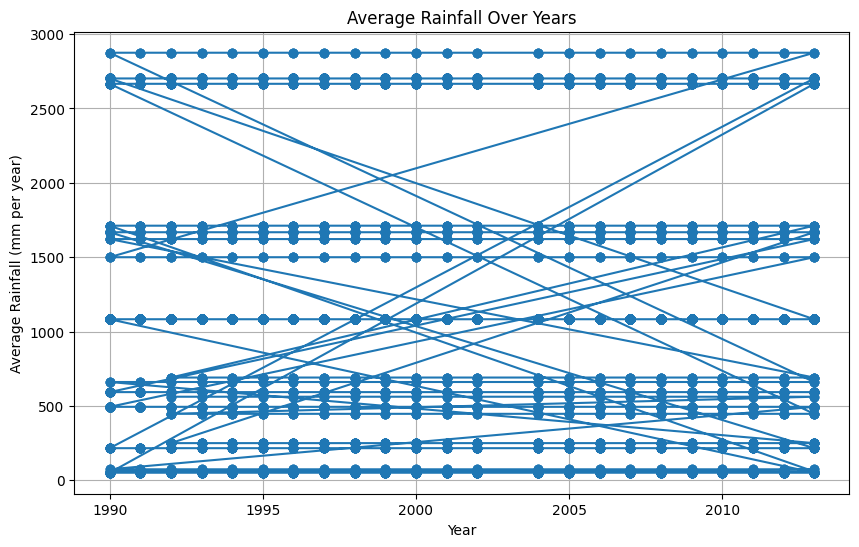

In [15]:
import matplotlib.pyplot as plt

# Plot the rainfall data over the years
plt.figure(figsize=(10, 6))
plt.plot(df['Year'], df['average_rain_fall_mm_per_year'], marker='o')
plt.xlabel('Year')
plt.ylabel('Average Rainfall (mm per year)')
plt.title('Average Rainfall Over Years')
plt.grid(True)
plt.show()


ODD how rainfall is so consistent throughout 20 years! - let's fix this by finding a new (RELIABLE) dataset (defined as df2 in the beginning). Then plot again.

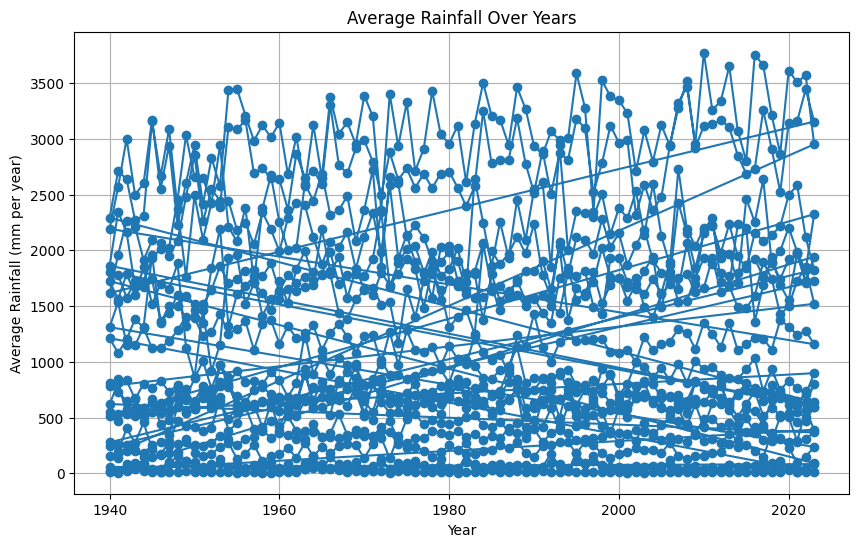

In [16]:
import matplotlib.pyplot as plt

# Plot the rainfall data over the years
plt.figure(figsize=(10, 6))
plt.plot(df2['Year'], df2['Annual precipitation'], marker='o')
plt.xlabel('Year')
plt.ylabel('Average Rainfall (mm per year)')
plt.title('Average Rainfall Over Years')
plt.grid(True)
plt.show()


Merge of datasets 1 and 2 and sorting based on 'Area' and 'Year'

In [17]:
# Rename columns in df2 to match df1 for merging
df2.rename(columns={'Entity': 'Area', 'Annual precipitation': 'Annual Rainfall(mm)'}, inplace=True)

# Merge df1 and df2 based on 'Area' and 'Year'
merged_df = pd.merge(df, df2[['Area', 'Year', 'Annual Rainfall(mm)']], on=['Area', 'Year'], how='left')

display(merged_df)


,Unnamed: 0,Area,Item,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,hg/ha_yield,total_yield,Annual Avg Temp(C),Annual Rainfall(mm)
0,745,Armenia,Maize,1992,562,8.0,7.44,32344,165245,7.440,865.78406
1,746,Armenia,Potatoes,1992,562,8.0,7.44,111301,165245,7.440,865.78406
2,747,Armenia,Wheat,1992,562,8.0,7.44,21600,165245,7.440,865.78406
3,748,Armenia,Maize,1993,562,8.0,7.69,32261,188934,7.690,880.93286
4,749,Armenia,Potatoes,1993,562,8.0,7.69,134416,188934,7.690,880.93286
...,...,...,...,...,...,...,...,...,...,...,...
10257,27145,Turkey,Wheat,2013,593,39440.0,20.22,28451,2914060,16.558,602.89655
10258,27146,Turkey,Wheat,2013,593,39440.0,13.27,28451,2914060,16.558,602.89655
10259,27147,Turkey,Wheat,2013,593,39440.0,14.07,28451,2914060,16.558,602.89655
10260,27148,Turkey,Wheat,2013,593,39440.0,16.02,28451,2914060,16.558,602.89655


Average rainfall in Asia from 1990 to 2013 (merged dataset 1+2)

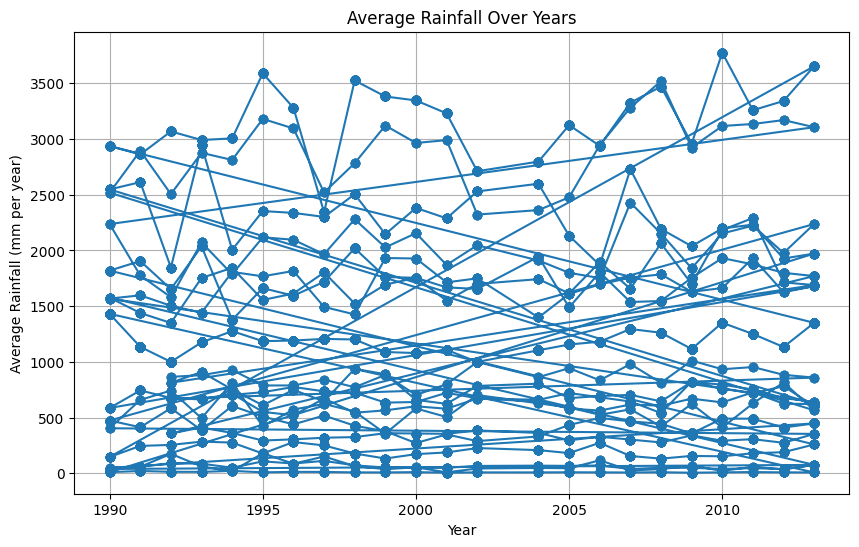

In [18]:
import matplotlib.pyplot as plt

# Plot the rainfall data over the years
plt.figure(figsize=(10, 6))
plt.plot(merged_df['Year'], merged_df['Annual Rainfall(mm)'], marker='o')
plt.xlabel('Year')
plt.ylabel('Average Rainfall (mm per year)')
plt.title('Average Rainfall Over Years')
plt.grid(True)
plt.show()

#looks good!


In [19]:
#Remove rows where the "Item" is not "Maize". We are looking at total crop yield, disregarding the crop type. 
#Maize is grown in all countries of our interest, hence we won't lose any Data.
df = merged_df[merged_df['Item'] == 'Maize']

# Display the filtered DataFrame
df.head()


,Unnamed: 0,Area,Item,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,hg/ha_yield,total_yield,Annual Avg Temp(C),Annual Rainfall(mm)
0,745,Armenia,Maize,1992,562,8.0,7.44,32344,165245,7.44,865.78406
3,748,Armenia,Maize,1993,562,8.0,7.69,32261,188934,7.69,880.93286
6,751,Armenia,Maize,1994,562,23.0,8.84,32667,181704,8.84,927.36945
9,754,Armenia,Maize,1995,562,23.9,9.76,18261,174937,9.76,788.58060
12,757,Armenia,Maize,1996,562,32.0,9.55,22239,175434,9.55,788.55570


In [20]:
#Drop irrelevant columns
df = df.drop(columns=['Unnamed: 0','hg/ha_yield','Item','average_rain_fall_mm_per_year','avg_temp'])
df.head(2)

,Area,Year,pesticides_tonnes,total_yield,Annual Avg Temp(C),Annual Rainfall(mm)
0,Armenia,1992,8.0,165245,7.44,865.78406
3,Armenia,1993,8.0,188934,7.69,880.93286


FROM previous trials of testing, we want to improve the model by adding more features to find a better correlation gradient. Lets do so from here.

In [21]:
#import new df of annual CO2 emissions
df_co2 = pd.DataFrame = pd.read_csv('Data/annual-co2-emissions-per-country.csv')

df_co2.head(3)

,Entity,Code,Year,Annual CO₂ emissions
0,Afghanistan,AFG,1949,14656.0
1,Afghanistan,AFG,1950,84272.0
2,Afghanistan,AFG,1951,91600.0


In [22]:
# check the pandas entity column contain the given list of countries (Asia)
countriesdf3 = (df_co2[df_co2['Entity'].isin(countries)])

countriesdf3.head()

,Entity,Code,Year,Annual CO₂ emissions
1009,Armenia,ARM,1830,40.00000
1010,Armenia,ARM,1831,49.00000
1011,Armenia,ARM,1832,32.00000
1012,Armenia,ARM,1833,40.00000
1013,Armenia,ARM,1850,250.99998


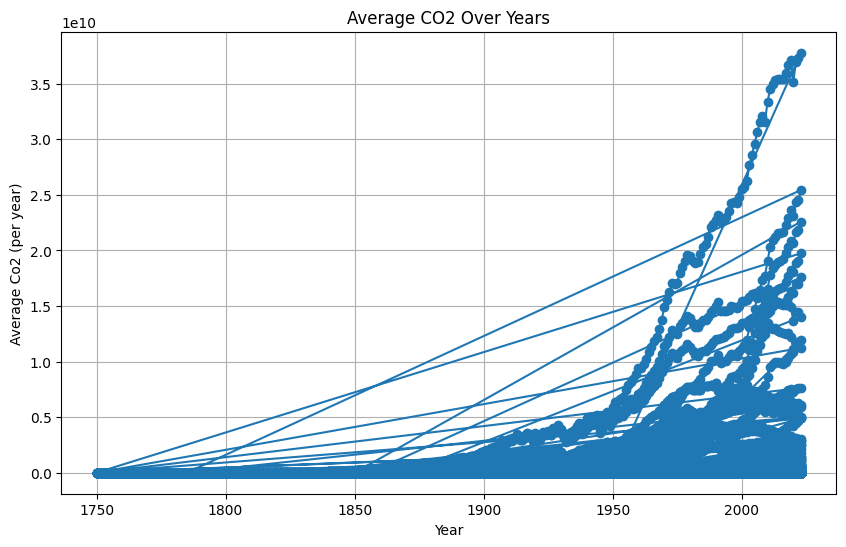

In [23]:
import matplotlib.pyplot as plt

# Plot the rainfall data over the years
plt.figure(figsize=(10, 6))
plt.plot(df_co2['Year'], df_co2['Annual CO₂ emissions'], marker='o')
plt.xlabel('Year')
plt.ylabel('Average Co2 (per year)')
plt.title('Average CO2 Over Years')
plt.grid(True)
plt.show()

#looks accurate. proceed

In [24]:
# Rename columns in df2 to match df1 for merging
df_co2.rename(columns={'Entity': 'Area'}, inplace=True)

# Merge df1 and df2 based on 'Area' and 'Year'
merged_df = pd.merge(df, df_co2[['Area', 'Year','Annual CO₂ emissions']], on=['Area', 'Year'], how='left')

merged_df.head()

,Area,Year,pesticides_tonnes,total_yield,Annual Avg Temp(C),Annual Rainfall(mm),Annual CO₂ emissions
0,Armenia,1992,8.0,165245,7.44,865.78406,5723698.0
1,Armenia,1993,8.0,188934,7.69,880.93286,2510247.0
2,Armenia,1994,23.0,181704,8.84,927.36945,2684702.0
3,Armenia,1995,23.9,174937,9.76,788.58060,3362694.0
4,Armenia,1996,32.0,175434,9.55,788.55570,2500312.0


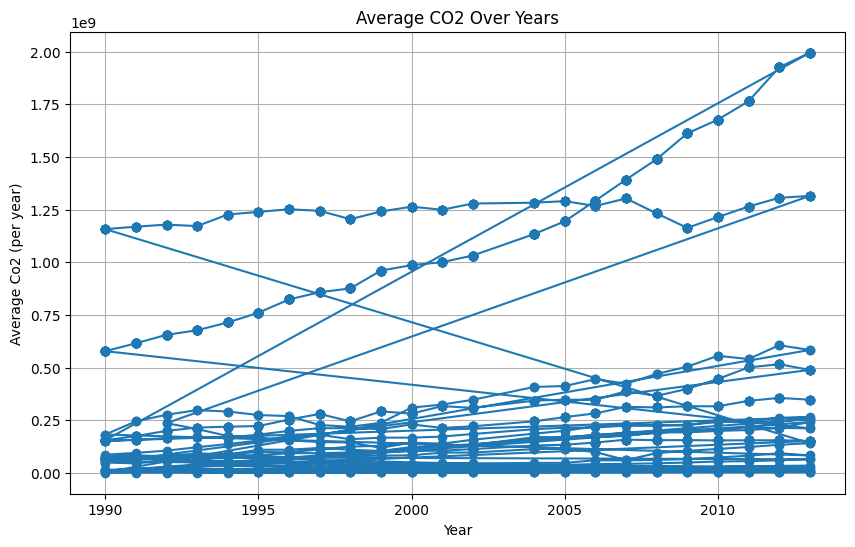

In [25]:
import matplotlib.pyplot as plt

# Plot the rainfall data over the years
plt.figure(figsize=(10, 6))
plt.plot(merged_df['Year'], merged_df['Annual CO₂ emissions'], marker='o')
plt.xlabel('Year')
plt.ylabel('Average Co2 (per year)')
plt.title('Average CO2 Over Years')
plt.grid(True)
plt.show()

#Looks accurate. proceed. got few outliers? May remove. Lets try without removing and with removing these outliers later on (next stage)

In [26]:
df = merged_df
df.head(3)

#looks as desired. Proceed. Data matches original CO2 dataframe

,Area,Year,pesticides_tonnes,total_yield,Annual Avg Temp(C),Annual Rainfall(mm),Annual CO₂ emissions
0,Armenia,1992,8.0,165245,7.44,865.78406,5723698.0
1,Armenia,1993,8.0,188934,7.69,880.93286,2510247.0
2,Armenia,1994,23.0,181704,8.84,927.36945,2684702.0


Next Feature to add : Cropland (Organic farming)

In [27]:
#We want to merge the organic and total cropland into df
df4: pd.DataFrame = pd.read_csv('Data/organic-agricultural-area.csv')

df4.head()

,Entity,Code,Year,Agriculture area certified organic | 00006672 || Area | 005110 || hectares,Agricultural land | 00006610 || Area | 005110 || hectares
0,Afghanistan,AFG,2007,20.0,37914000.0
1,Afghanistan,AFG,2008,20.0,37916000.0
2,Afghanistan,AFG,2009,30.0,37916000.0
3,Afghanistan,AFG,2010,40.0,37917000.0
4,Afghanistan,AFG,2011,40.0,37915000.0


In [28]:
# Rename columns in df4
df4.rename(columns={'Entity': 'Area','Agriculture area certified organic | 00006672 || Area | 005110 || hectares':'Organic Land Area in Hectares','Agricultural land | 00006610 || Area | 005110 || hectares': "Total Agricultural land area in hectares"}, inplace=True)

df4.head()

,Area,Code,Year,Organic Land Area in Hectares,Total Agricultural land area in hectares
0,Afghanistan,AFG,2007,20.0,37914000.0
1,Afghanistan,AFG,2008,20.0,37916000.0
2,Afghanistan,AFG,2009,30.0,37916000.0
3,Afghanistan,AFG,2010,40.0,37917000.0
4,Afghanistan,AFG,2011,40.0,37915000.0


In [29]:
# Merge the datasets
merged_df = pd.merge(df, df4[['Area', 'Year','Organic Land Area in Hectares','Total Agricultural land area in hectares']], on=['Area', 'Year'], how='left')

# Fill NAN values with a numerical value : 0. Some countries only began organic practices later on.
merged_df['Organic Land Area in Hectares'].fillna(0, inplace=True)

merged_df.head()


C:\Users\Phoebe\AppData\Local\Temp\ipykernel_18740\3164502258.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_df['Organic Land Area in Hectares'].fillna(0, inplace=True)


,Area,Year,pesticides_tonnes,total_yield,Annual Avg Temp(C),Annual Rainfall(mm),Annual CO₂ emissions,Organic Land Area in Hectares,Total Agricultural land area in hectares
0,Armenia,1992,8.0,165245,7.44,865.78406,5723698.0,0.0,1170000.0
1,Armenia,1993,8.0,188934,7.69,880.93286,2510247.0,0.0,1181000.0
2,Armenia,1994,23.0,181704,8.84,927.36945,2684702.0,0.0,1200000.0
3,Armenia,1995,23.9,174937,9.76,788.58060,3362694.0,0.0,1244000.0
4,Armenia,1996,32.0,175434,9.55,788.55570,2500312.0,0.0,1306000.0


In [30]:
df =  merged_df

Last Feature to add

In [31]:
#We want to merge the fertiliser land into my dataset merged_df
df_fert: pd.DataFrame = pd.read_csv('Data/fertilizer-use-in-kg-per-hectare-of-arable-land.csv')

df_fert.head(3)


,Entity,Code,Year,Fertilizer consumption (kilograms per hectare of arable land)
0,Afghanistan,AFG,1961,0.143791
1,Afghanistan,AFG,1962,0.142857
2,Afghanistan,AFG,1963,0.141935


In [32]:
# Rename columns in df2 to match df1 for merging
df_fert.rename(columns={'Entity': 'Area','Fertilizer consumption (kilograms per hectare of arable land)':'Fertiliser Used (kg/ha)'}, inplace=True)
df_fert.head(3)


,Area,Code,Year,Fertiliser Used (kg/ha)
0,Afghanistan,AFG,1961,0.143791
1,Afghanistan,AFG,1962,0.142857
2,Afghanistan,AFG,1963,0.141935


In [33]:
# Merge the datasets
merged_df = pd.merge(df, df_fert[['Area', 'Year','Fertiliser Used (kg/ha)']], on=['Area', 'Year'], how='left')

merged_df.head()


,Area,Year,pesticides_tonnes,total_yield,Annual Avg Temp(C),Annual Rainfall(mm),Annual CO₂ emissions,Organic Land Area in Hectares,Total Agricultural land area in hectares,Fertiliser Used (kg/ha)
0,Armenia,1992,8.0,165245,7.44,865.78406,5723698.0,0.0,1170000.0,59.101654
1,Armenia,1993,8.0,188934,7.69,880.93286,2510247.0,0.0,1181000.0,34.642033
2,Armenia,1994,23.0,181704,8.84,927.36945,2684702.0,0.0,1200000.0,16.091953
3,Armenia,1995,23.9,174937,9.76,788.58060,3362694.0,0.0,1244000.0,16.091953
4,Armenia,1996,32.0,175434,9.55,788.55570,2500312.0,0.0,1306000.0,17.777779


In [34]:
df = merged_df

df.head(2)

,Area,Year,pesticides_tonnes,total_yield,Annual Avg Temp(C),Annual Rainfall(mm),Annual CO₂ emissions,Organic Land Area in Hectares,Total Agricultural land area in hectares,Fertiliser Used (kg/ha)
0,Armenia,1992,8.0,165245,7.44,865.78406,5723698.0,0.0,1170000.0,59.101654
1,Armenia,1993,8.0,188934,7.69,880.93286,2510247.0,0.0,1181000.0,34.642033


In [35]:
df.duplicated().sum()

np.int64(1102)

In [36]:
df.tail() #there are duplicates. Let's fix this.

,Area,Year,pesticides_tonnes,total_yield,Annual Avg Temp(C),Annual Rainfall(mm),Annual CO₂ emissions,Organic Land Area in Hectares,Total Agricultural land area in hectares,Fertiliser Used (kg/ha)
1526,Turkey,2013,39440.0,2914060,16.558,602.89655,347331740.0,559000.0,38423000.0,112.381355
1527,Turkey,2013,39440.0,2914060,16.558,602.89655,347331740.0,559000.0,38423000.0,112.381355
1528,Turkey,2013,39440.0,2914060,16.558,602.89655,347331740.0,559000.0,38423000.0,112.381355
1529,Turkey,2013,39440.0,2914060,16.558,602.89655,347331740.0,559000.0,38423000.0,112.381355
1530,Turkey,2013,39440.0,2914060,16.558,602.89655,347331740.0,559000.0,38423000.0,112.381355


In [37]:
#remove Duplicates
df.drop_duplicates(keep='first',inplace = True)
df.duplicated().sum()

np.int64(0)

In [38]:
display(df)

,Area,Year,pesticides_tonnes,total_yield,Annual Avg Temp(C),Annual Rainfall(mm),Annual CO₂ emissions,Organic Land Area in Hectares,Total Agricultural land area in hectares,Fertiliser Used (kg/ha)
0,Armenia,1992,8.00,165245,7.440,865.78406,5723698.0,0.0,1170000.0,59.101654
1,Armenia,1993,8.00,188934,7.690,880.93286,2510247.0,0.0,1181000.0,34.642033
2,Armenia,1994,23.00,181704,8.840,927.36945,2684702.0,0.0,1200000.0,16.091953
3,Armenia,1995,23.90,174937,9.760,788.58060,3362694.0,0.0,1244000.0,16.091953
4,Armenia,1996,32.00,175434,9.550,788.55570,2500312.0,0.0,1306000.0,17.777779
...,...,...,...,...,...,...,...,...,...,...
1506,Turkey,2009,37651.15,2845910,15.536,823.38275,316412300.0,250000.0,38911000.0,104.566154
1511,Turkey,2010,38554.69,3075265,16.592,758.93677,316193060.0,192000.0,39012000.0,98.375656
1516,Turkey,2011,39534.43,3106400,14.520,717.69086,342057300.0,326000.0,38247000.0,89.941140
1521,Turkey,2012,42610.59,2834620,15.518,781.95840,356107200.0,399000.0,38407000.0,100.346405


Before we move on, to statistics. To reiterate what our target features and features are:

Target: total_yield

Features:
- pesticide_tonnes
- Avg Temp(C)
- Annual Rainfall(mm)
- Annual CO2 emissions
- Organic Land Area in Hectares
- Fertiliser Used(kg/ha)

DESCRIPTIVE STATISTICS

In [39]:
# View the index number and label for each column
for x, y in enumerate(df.columns):
    print(x, y)

0 Area
1 Year
2 pesticides_tonnes
3 total_yield
4 Annual Avg Temp(C)
5 Annual Rainfall(mm)
6 Annual CO₂ emissions
7 Organic Land Area in Hectares
8 Total Agricultural land area in hectares
9 Fertiliser Used (kg/ha)


In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

# Explicitly convert to DataFrame and ensure the correct type
df = pd.DataFrame(df)

# Check the first few rows to verify
print(df.head())

# Plot using seaborn with explicit data type
plt.figure(figsize=(10, 6))
sns.boxplot(x='total_yield', data=df)
plt.title('Box Plot of Yield')
plt.xlabel('Total Yield')
plt.show()


TypeError: 'DataFrame' object is not callable

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


# Heatmap of correlation matrix
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


ValueError: could not convert string to float: 'Armenia'

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Create a small sample DataFrame
data = {
    'total_yield': np.random.normal(loc=175000, scale=30000, size=100)
}
sample_df = pd.DataFrame(data)

# Verify the structure and types of the sample DataFrame
print(sample_df.info())

# Create a box plot with the sample DataFrame
plt.figure(figsize=(10, 6))
sns.boxplot(x='total_yield', data=sample_df)
plt.title('Box Plot of Yield')
plt.xlabel('Total Yield')
plt.show()


TypeError: 'DataFrame' object is not callable

# Visualization with analysis

#### Building the model

Handling of outliers

In [44]:
# Detect and cap outliers
def cap_outliers(df, column_name):
    lower_bound = df[column_name].quantile(0.05)
    upper_bound = df[column_name].quantile(0.95)
    df.loc[:, column_name] = np.clip(df[column_name], lower_bound, upper_bound)
    return df

# Apply outlier handling directly to the DataFrame
df = df.copy()  # Create a copy of the DataFrame to avoid modifying the original
df = cap_outliers(df, 'total_yield')
df = cap_outliers(df, 'Annual Avg Temp(C)')
df = cap_outliers(df, 'Annual CO₂ emissions')


In [45]:
df.head()

,Area,Year,pesticides_tonnes,total_yield,Annual Avg Temp(C),Annual Rainfall(mm),Annual CO₂ emissions,Organic Land Area in Hectares,Total Agricultural land area in hectares,Fertiliser Used (kg/ha)
0,Armenia,1992,8.0,175255.08,7.44,865.78406,5723698.00,0.0,1170000.0,59.101654
1,Armenia,1993,8.0,188934.00,7.69,880.93286,2529497.24,0.0,1181000.0,34.642033
2,Armenia,1994,23.0,181704.00,8.84,927.36945,2684702.00,0.0,1200000.0,16.091953
3,Armenia,1995,23.9,175255.08,9.76,788.58060,3362694.00,0.0,1244000.0,16.091953
4,Armenia,1996,32.0,175434.00,9.55,788.55570,2529497.24,0.0,1306000.0,17.777779


#### Model #1 Linear Regression (Part 1)
Setting up of functions: 
- normalise_z
- get_features_targets
- calc_linreg
- prepare_feature
- compute_cost_linreg
- gradient_descent

Results:<br>
Mean Squared Error: 2720381242205.7563<br>
Mean Absolute Error: 1073047.662556836<br>
R-squared: 0.6013454617511773<br>
Root Mean Squared Error: 1649357.8272181437

In [41]:
# Normalize function
def normalize_z(array: np.ndarray, columns_means: Optional[np.ndarray] = None, columns_stds: Optional[np.ndarray] = None) -> tuple[np.ndarray, np.ndarray, np.ndarray]:
    if columns_means is None:
        columns_means = array.mean(axis=0)
    if columns_stds is None:
        columns_stds = array.std(axis=0)
    columns_stds[columns_stds == 0] = 1  # To prevent division by zero
    out = (array - columns_means) / columns_stds
    return out, columns_means, columns_stds

# Get features and targets
def get_features_targets(df: pd.DataFrame, feature_names: list[str], target_names: list[str]) -> tuple[pd.DataFrame, pd.DataFrame]:
    df_feature = df.loc[:, feature_names]
    df_target = df.loc[:, target_names]
    return df_feature, df_target

# Linear regression calculation
def calc_linreg(X: np.ndarray, beta: np.ndarray) -> np.ndarray:
    return np.matmul(X, beta)

# Prepare feature matrix
def prepare_feature(np_feature: np.ndarray) -> np.ndarray:
    m, _ = np_feature.shape
    x0 = np.ones((m, 1))
    return np.concatenate((x0, np_feature), axis=1)

# Cost computation
def compute_cost_linreg(X: np.ndarray, y: np.ndarray, beta: np.ndarray) -> np.ndarray:
    m, _ = X.shape
    y_hat = calc_linreg(X, beta)
    delta = y_hat - y
    delta_sq = delta**2
    J = np.sum(delta_sq) / (2*m)
    return np.squeeze(J)

# Gradient descent implementation
def gradient_descent(X: np.ndarray, y: np.ndarray, beta: np.ndarray, learning_rate: float = 0.01, iterations: int = 1000) -> tuple[np.ndarray, np.ndarray]:
    m, _ = X.shape
    cost_history = np.zeros(iterations)
    for i in range(iterations):
        y_hat = calc_linreg(X, beta)
        errors = y_hat - y
        gradient = (1/m) * X.T.dot(errors)
        beta -= learning_rate * gradient
        cost_history[i] = compute_cost_linreg(X, y, beta)
    return beta, cost_history


In [42]:
df.head(1)

,Area,Year,pesticides_tonnes,total_yield,Annual Avg Temp(C),Annual Rainfall(mm),Annual CO₂ emissions,Organic Land Area in Hectares,Total Agricultural land area in hectares,Fertiliser Used (kg/ha)
0,Armenia,1992,8.0,165245,7.44,865.78406,5723698.0,0.0,1170000.0,59.101654


### Evaluating the Model

- Describe the metrics of your choice
- Evaluate your model performance

##### Part 2:
- Set up of training and test datas
- Execution

In [43]:
# Evaluation metrics
def calculate_metrics(y_true: np.ndarray, y_pred: np.ndarray) -> tuple[float, float, float, float]:
    mse = np.mean((y_true - y_pred) ** 2)
    mae = np.mean(np.abs(y_true - y_pred))
    if np.std(y_true) == 0:
        r2 = np.nan
    else:
        r2 = 1 - (np.sum((y_true - y_pred) ** 2) / np.sum((y_true - np.mean(y_true)) ** 2))
    rmse = np.sqrt(mse)
    return mse, mae, r2, rmse

#Dummy variables no longer needed. Hence excluded.

# Expanded feature set including dummy variables for crop types
feature_names = ['pesticides_tonnes', 'Organic Land Area in Hectares','Total Agricultural land area in hectares','Annual CO₂ emissions','Fertiliser Used (kg/ha)'] + [col for col in df.columns if 'Item_' in col]
target_name = ['total_yield']

# Step 2: Define features and target
df_feature, df_target = get_features_targets(df, feature_names, target_name)

# Step 3: Normalize the features
df_feature_array = df_feature.to_numpy(dtype=np.float64)
df_feature_array = np.nan_to_num(df_feature_array)
array_feature, columns_means, columns_stds = normalize_z(df_feature_array)

# Step 4: Prepare the feature matrix
X = prepare_feature(array_feature)
y = df_target.to_numpy()

# Step 5: Train-test split
def train_test_split_manual(X: np.ndarray, y: np.ndarray, test_size: float = 0.2, random_state: Optional[int] = None) -> tuple[np.ndarray, np.ndarray, np.ndarray, np.ndarray]:
    np.random.seed(random_state)
    indices = np.random.permutation(X.shape[0])
    test_size = int(X.shape[0] * test_size)
    test_indices = indices[:test_size]
    train_indices = indices[test_size:]
    return X[train_indices], X[test_indices], y[train_indices], y[test_indices]

X_train, X_test, y_train, y_test = train_test_split_manual(X, y, test_size=0.2, random_state=42)

# Step 6: Initialize beta
beta = np.zeros((X_train.shape[1], 1))

# Step 7: Train the model using gradient descent
learning_rate = 0.01
iterations = 1400
beta, cost_history = gradient_descent(X_train, y_train, beta, learning_rate, iterations)

# Step 8: Make predictions
y_pred = calc_linreg(X_test, beta)

# Step 9: Evaluate the model
mse, mae, r2, rmse = calculate_metrics(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R-squared: {r2}')
print(f'Root Mean Squared Error: {rmse}')

print("Intercept:", beta[0])
print("Coefficients:", beta[1:])

Mean Squared Error: 3376225577465.041
Mean Absolute Error: 1170443.0087525095
R-squared: 0.5942227739828968
Root Mean Squared Error: 1837450.8367477593
Intercept: [1834918.99716324]
Coefficients: [[  16664.40892847]
 [ 302418.70742698]
 [ 427987.90773467]
 [2446348.26557268]
 [-180242.16150647]]


##### Model #1 graph: Cost Function History during Gradient Descent

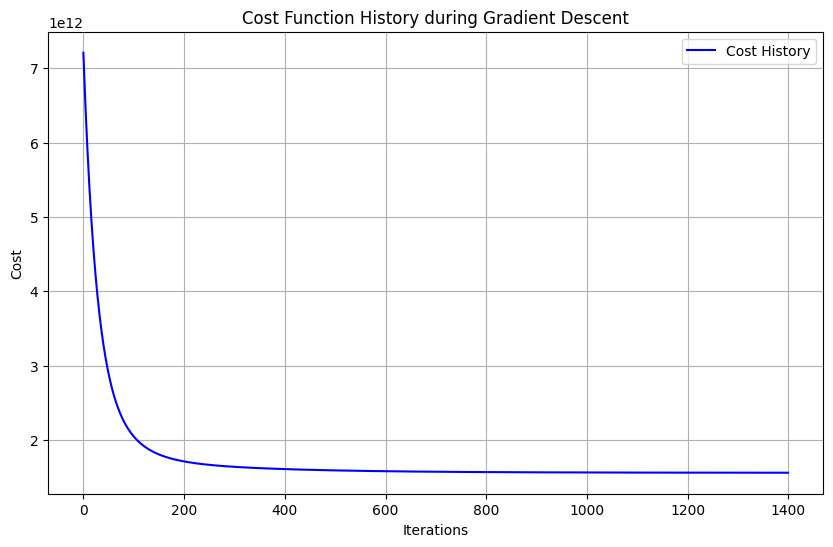

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from typing import Optional

# Step 10: Plot cost function history
plt.figure(figsize=(10, 6))
plt.plot(cost_history, 'b-', label='Cost History')
plt.title('Cost Function History during Gradient Descent')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.legend()
plt.grid(True)
plt.show()


### Improving the Model

- Improve the models by performing any data processing techniques or hyperparameter tuning.
- You can repeat the steps above to show the improvement as compared to the previous performance

Note:
- You should not change or add dataset at this step
- You are allowed to use library such as sklearn for data processing (NOT for building model)
- Make sure to have the same test dataset so the results are comparable with the previous model 
- If you perform hyperparameter tuning, it will require you to split your training data further into train and validation dataset

#### Model #2 (Polynomial Algorithm)
Setting up of functions:
- split_data
- transform_features
- gradient_descent
- calculate_metrics

In [45]:
# Define features and target
X = df.drop(columns=['Area', 'Year','Total Agricultural land area in hectares']).values
y = df['total_yield'].values


# Split data into train and test datasets, test size = random so can repeat
def split_data(df_feature: pd.DataFrame, 
               df_target: pd.DataFrame, 
               random_state: Optional[int]=None, 
               test_size: float=0.5) -> tuple[pd.DataFrame, pd.DataFrame, pd.DataFrame, pd.DataFrame]:
    ###
    indexes: pd.Index = df_feature.index
    if random_state != None:
        np.random.seed(random_state)
    k = int(test_size * len(indexes))
    test_index: pd.Index = np.random.choice(indexes, k, replace=False)
    train_index: pd.Index = indexes.drop(test_index)
    df_feature_train: pd.DataFrame = df_feature.loc[train_index, :]
    df_feature_test: pd.DataFrame = df_feature.loc[test_index, :]
    df_target_train: pd.DataFrame = df_target.loc[train_index, :]
    df_target_test: pd.DataFrame = df_target.loc[test_index, :]
    ###
    return df_feature_train, df_feature_test, df_target_train, df_target_test


# Function to create polynomial features
def transform_features(df_feature: pd.DataFrame, colname: str, degree: int) -> pd.DataFrame:
    for d in range(2, degree + 1):
        colname_transformed = f"{colname}^{d}"
        df_feature[colname_transformed] = df_feature[colname] ** d
    return df_feature


# Transforming features in cubic formula (x^3)
degree = 3  # Degree of the polynomial so its x^3 formula

feature_names = ['Annual Rainfall(mm)', 'pesticides_tonnes', 'Annual Avg Temp(C)', 'Annual CO₂ emissions','Fertiliser Used (kg/ha)'] + [col for col in df.columns if 'Item_' in col]


# Looping it for the 3 features so the values all ** 3
for i in feature_names:
    df = transform_features(df, i, degree)


# Redefine features and target after the transform
X = df.drop(columns=['Area', 'Year','Total Agricultural land area in hectares']).values
y = df['total_yield'].values


# Split data into training and testing sets
df_features_train, df_features_test, df_target_train, df_target_test = split_data(df_feature, df_target, random_state=100, test_size=0.3)

# Normalize features into numpy arrays
# Replace NaN with 0
df_features_train_array = df_features_train.to_numpy(dtype=np.float64)
df_features_train_array = np.nan_to_num(df_features_train_array)
array_features_train_z, means, stds = normalize_z(df_features_train_array)

# Convert target y to numpy array
X_train = prepare_feature(array_features_train_z)
y_train = df_target_train.to_numpy()

# DOuble confirm is float type (64 bit)
X_train = X_train.astype(np.float64)
y_train = y_train.astype(np.float64)

# Initialize beta
beta = np.zeros((X_train.shape[1], 1))

# Train the model using gradient descent
learning_rate = 0.01
iterations = 1000
beta, cost_history = gradient_descent(X_train, y_train, beta, learning_rate, iterations)

# Prepare the test feature matrix
df_features_test_array = df_features_test.to_numpy(dtype=np.float64)
df_features_test_array = np.nan_to_num(df_features_test_array)
array_features_test_z, _, _ = normalize_z(df_features_test_array, means, stds)
X_test = prepare_feature(array_features_test_z)
y_test = df_target_test.to_numpy()

# Ensure correct data types
X_test = X_test.astype(np.float64)
y_test = y_test.astype(np.float64)

# Preview
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("beta shape:", beta.shape)

# Test test
y_pred = calc_linreg(X_test, beta)

# Evaluate model
mse, mae, r2, rmse = calculate_metrics(y_test, y_pred)

# Voila
print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R-squared: {r2}')
print(f'Root Mean Squared Error: {rmse}')

print("Intercept:", beta[0])
print("Coefficients:", beta[1:])

X_train shape: (301, 6)
X_test shape: (128, 6)
beta shape: (6, 1)
Mean Squared Error: 3027881473282.593
Mean Absolute Error: 1013185.4072235799
R-squared: 0.6800842055830324
Root Mean Squared Error: 1740080.8812473612
Intercept: [1910107.8071284]
Coefficients: [[ 195640.77354713]
 [ 374557.91576143]
 [ 471753.59106392]
 [2311205.91164573]
 [-226131.65966697]]


#### Model #3 (Gradient Descent Algorithm)
Setting up of functions:
- train_test_split_manual
- compute_cost
- gradient_descent
- calculate_metrics

In [46]:
# Step 1: Define features (X) and target (y)
X = df.drop(columns=['Area', 'Year','Total Agricultural land area in hectares']).values
y = df['total_yield'].values

# Step 2: Normalize the feature data
X_mean = X.mean(axis=0)
X_std = X.std(axis=0)
X_normalized = (X - X_mean) / X_std

# Step 3: Add a column of ones to X_normalized for the intercept term
X_normalized = np.hstack((np.ones((X_normalized.shape[0], 1)), X_normalized))

# Step 4: Train-test split
def train_test_split_manual(X, y, test_size=0.2, random_state=None):
    np.random.seed(random_state)
    indices = np.random.permutation(X.shape[0])
    test_size = int(X.shape[0] * test_size)
    test_indices = indices[:test_size]
    train_indices = indices[test_size:]
    return X[train_indices], X[test_indices], y[train_indices], y[test_indices]

X_train, X_test, y_train, y_test = train_test_split_manual(X_normalized, y, test_size=0.2, random_state=42)

# Step 5: Initialize parameters (theta)
theta = np.zeros(X_train.shape[1])

# Compute cost function
def compute_cost(X, y, theta):
    m = len(y)
    predictions = X.dot(theta)
    cost = (1/(2*m)) * np.sum((predictions - y) ** 2)
    return cost

# Gradient Descent Algorithm
def gradient_descent(X, y, theta, learning_rate=0.01, iterations=1000):
    m = len(y)
    cost_history = np.zeros(iterations)

    for i in range(iterations):
        predictions = X.dot(theta)
        errors = predictions - y
        gradient = (1/m) * X.T.dot(errors)
        theta -= learning_rate * gradient
        cost_history[i] = compute_cost(X, y, theta)
    
    return theta, cost_history

# Step 6: Train the model using gradient descent
learning_rate = 0.01
iterations = 1000
theta, cost_history = gradient_descent(X_train, y_train, theta, learning_rate, iterations)

# Step 7: Make predictions
y_pred = X_test.dot(theta)

# Step 8: Evaluate the model
def calculate_metrics(y_true, y_pred):
    mse = np.mean((y_true - y_pred) ** 2)
    mae = np.mean(np.abs(y_true - y_pred))
    r2 = 1 - (np.sum((y_true - y_pred) ** 2) / np.sum((y_true - np.mean(y_true)) ** 2))
    rmse = np.sqrt(mse)
    return mse, mae, r2, rmse

mse, mae, r2, rmse = calculate_metrics(y_test, y_pred)

#print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R-squared: {r2}')
#print(f'Root Mean Squared Error: {rmse}')

print("Intercept:", theta[0])
print("Coefficients:", theta[1:])


Mean Absolute Error: 147588.78690408397
R-squared: 0.9948581762514505
Intercept: 1856920.1639189369
Coefficients: [ 219602.17872344 2943464.86360398   65260.85940764   53628.1342837
  296709.59396614    3810.71010103 -161960.92872249  -72375.49636985
   25726.57413139  -24109.8357773  -223232.86844119   26588.57118004
  -39068.15914311   92371.69869186  -82734.66094314   13996.0521627
   75511.68616048]


Model #3 Actual vs Predicted Crop Yields graph

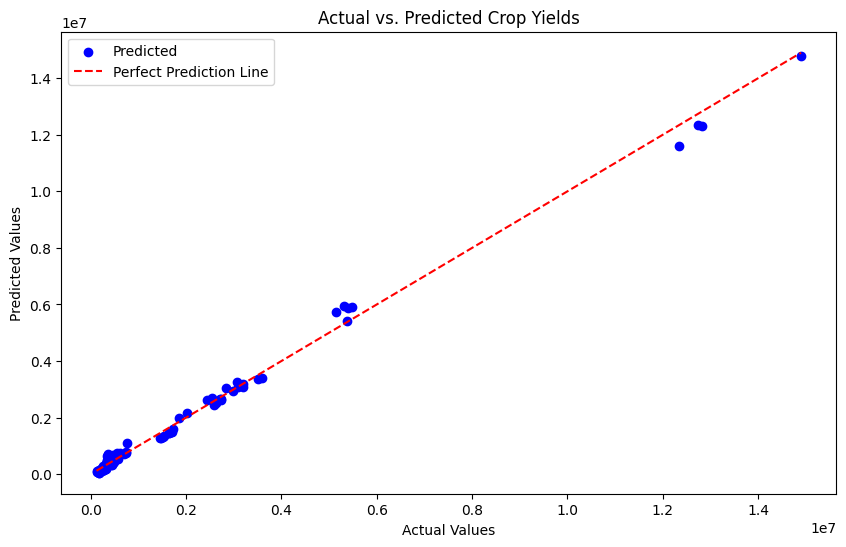

In [47]:
import matplotlib.pyplot as plt

# Ensure y_test and y_pred are correctly defined
X_train, X_test, y_train, y_test = train_test_split_manual(X_normalized, y, test_size=0.2, random_state=42)

# Train the model and make predictions
theta = np.zeros(X_train.shape[1])
learning_rate = 0.01
iterations = 1000
theta, cost_history = gradient_descent(X_train, y_train, theta, learning_rate, iterations)
y_pred = X_test.dot(theta)

# Plot the actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Prediction Line')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Crop Yields')
plt.legend()
plt.show()

### Discussion and Analysis

- Analyze the results of your metrics.
- Explain how does your analysis and machine learning help to solve your problem statement.
- Conclusion

#### Descriptive statistics

ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 2 with shape (17,) and arg 3 with shape (7,).

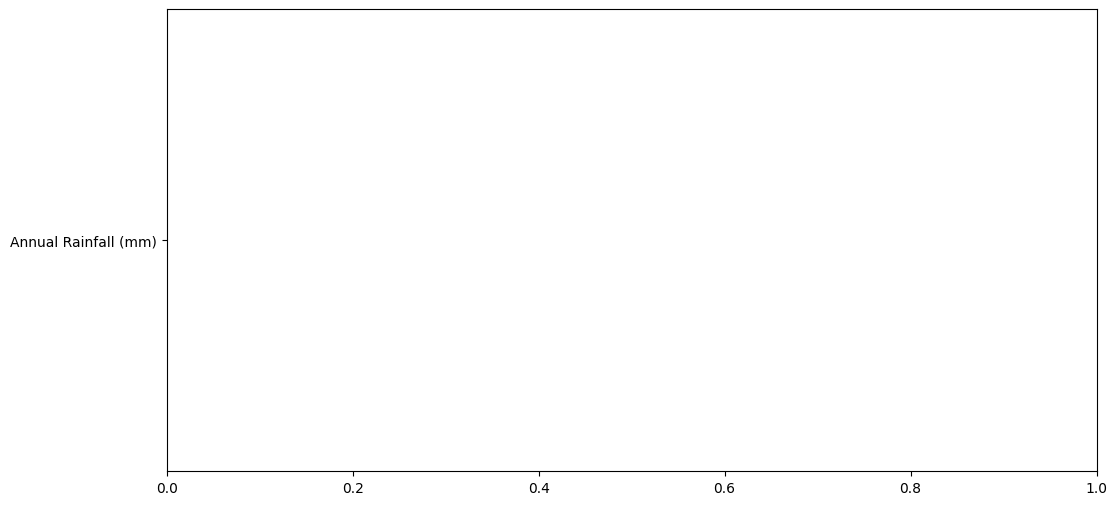

In [49]:
import matplotlib.pyplot as plt
import numpy as np

# Feature names corresponding to the coefficients
feature_names = [
    'Annual Rainfall (mm)', 'Pesticides Usage (tonnes)', 'Annual Avg Temp (C)',
    'Annual CO₂ Emissions', 'Fertiliser Used (kg/ha)', 'Organic Land Area (ha)',
    'Total Agricultural Land Area (ha)'
]

# Coefficients from your model
coefficients = theta[1:]

# Plotting the coefficients
plt.figure(figsize=(12, 6))
plt.barh(feature_names, coefficients, color='skyblue')
plt.xlabel('Coefficient Value')
plt.title('Influence of Different Features on Crop Yield')
plt.grid(True)
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram of crop yield
sns.histplot(df['hg/ha_yield'])
plt.title('Distribution of Crop Yield')
plt.show()

# Scatter plot between temperature and crop yield
sns.scatterplot(x='avg_temp', y='hg/ha_yield', data=df)
plt.title('Temperature vs Crop Yield')
plt.show()

# Heatmap of correlation matrix
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [ ]:
import seaborn as sns

# Box plot for crop yield
sns.boxplot(df['hg/ha_yield'])
plt.title('Box Plot of Crop Yield')
plt.show()


In [ ]:
import seaborn as sns

# Box plot for crop yield
sns.boxplot(df['avg_temp'])
plt.title('Box Plot of Temperature')
plt.show()


In [ ]:
import seaborn as sns

# Box plot for crop yield
sns.boxplot(df['pesticides_tonnes'])
plt.title('Box Plot of Pesticides')
plt.show()
